# Ecuación de Schrödinger: Estados Ligados

In [15]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt


## Ecuación de Schrödinger: 

## \begin{eqnarray} -\frac{1}{2}\frac{\partial^2 \varphi(x)}{\partial x} + V(x) \, \varphi(x) &=&  E \, \varphi(x) \nonumber \\ \frac{\partial^2 \varphi(x)}{\partial x^2} - 2\left[V(x) -E \right] \, \varphi(x) &=& 0 \nonumber  \\ \Rightarrow \frac{\partial^2 \varphi(x)}{\partial x^2} &=&  2\left[V(x) -E \right] \, \varphi(x) \nonumber  \end{eqnarray}   \begin{eqnarray} \mathbf{y} \equiv \left[ y_0, y_1 \right] = \left[\varphi(x),  \frac{\partial \varphi(x)}{\partial x} \right] \nonumber  \end{eqnarray}   \begin{eqnarray} \frac{\partial \mathbf{y}}{\partial x} &=&  \frac{\partial}{\partial x} \left[ \varphi(x), \frac{\partial \varphi(x)}{\partial x} \right] =   \left[ \frac{\partial \varphi(x)}{\partial x},\frac{\partial^2 \varphi(x)}{\partial x^2}   \right] =  \nonumber \\  &=& \left[y_1, 2\left(V(x)-E\right) y_0 \right] \equiv \left[y_1, g(x) y_0 \right] \nonumber \end{eqnarray}

In [16]:
# Definición del Potencial

def Vpot(x):
    return ( (x-5)**2 )/ 2.0


## Solución de la Ecuación  $$\begin{eqnarray} \frac{\partial \mathbf{y}}{\partial x} &=&  \left[  y_1, 2  \left(  V(x) - E  \right) y_0 \right]   \nonumber \end{eqnarray} $$

In [17]:
def g(y, x, E):
    return [y[1],2*(Vpot(x)-E)*y[0]]

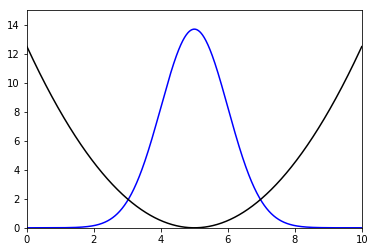

In [18]:
# Valores iniciales de phi(x) y phi'(x)
initialY = 0.0,0.0005

# Valor tentativo de E
E = 0.5

x = np.linspace(0,10,1000)

# Solucion ecuación diferencial
sol = odeint(g,initialY,x,(E,))

# Ploteo de solución
plt.plot(x, sol[:,0], color='b')
plt.axis([0, 10, 0,15])
plt.plot(x,Vpot(x),color='k')
plt.show()


## Ejercicio: Encontrar el 1er Estado Excitado

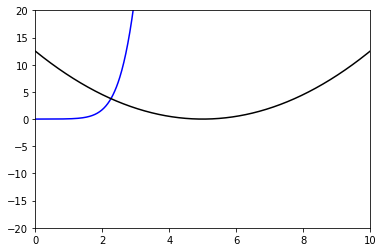

In [5]:
#Solución: 

init = 0.0,0.005
E = 0.2
x = np.linspace(0,10,1000)
sol2 = odeint(g,init,x,(E,))

plt.plot(x, sol2[:,0], color='b')
plt.axis([0, 10, -20,20])
plt.plot(x,Vpot(x),color='k')
plt.show()


## Otros Potenciales

In [6]:
# Definición del Potencial Wood-Saxon

def Vpot(x):
    U = 7
    a = 2
    pot = -U / ( np.exp((x-a)**2) + 1 )   
    return pot


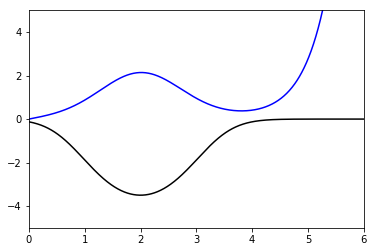

In [7]:
init = 0.0,0.5
E = -2.61
x = np.linspace(0,6,1000)
sol = odeint(g,init,x,(E,))

plt.plot(x, sol[:,0], color='b')
plt.plot(x,Vpot(x),color='k')
plt.axis([0, 6, -5,5])
plt.show()


### Solución Interactiva

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy as sp
from scipy.integrate import odeint


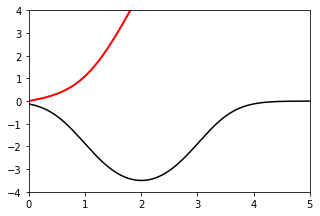

In [9]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
xmin = 0
xmax = 5
npts = 1000

x = np.linspace(xmin, xmax,npts)

# Valores iniciales de phi(x) y phi'(x)
initialY = 0.0,0.5

# Valor tentativo de E
Ener = -3.5

def function(Ener,x):
# Solucion ecuación diferencial
    y = odeint(g,initialY,x,(Ener,))
    return y
    
s = function(Ener,x)


l, = plt.plot(x,s[:,0], lw=2, color='red')
plt.plot(x,Vpot(x),color='k')
plt.axis([xmin,xmax, -4, 4]);

In [10]:
axcolor = 'lightgoldenrodyellow'
axenergy = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)

senergy = Slider(axenergy, 'Energy', -3.5,0.5,valinit=Ener)

/home/bionic/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [11]:
def update(val):
    Ener = senergy.val
    y = function(Ener,x)
    l.set_ydata(y[:,0])
    fig.canvas.draw_idle()

senergy.on_changed(update);


In [12]:
plt.show()

## Ejercicios:

- Encontrar Estados Excitados (si existen) 
- Repetir el ejercicio centrando el potencial en $a=2$
- Encontrar los 4 primeros estados ligados de un pozo finito
